# Preprocessing the dataset

In [1]:
import pandas as pd

## Data 1
dodgers loop sensor data set

### import data set

In [2]:
data_1_a = pd.read_csv(r'data\dodgers+loop+sensor\Dodgers.data', sep=',', engine='python', header=None)
data_1_b = pd.read_csv(r'data\dodgers+loop+sensor\Dodgers.events', sep=',', engine='python', header=None, encoding='windows-1252')

In [3]:
data_1_a.columns = ['timestamp', 'count']
data_1_a.head(1)

,timestamp,count
0,4/10/2005 0:00,-1


In [4]:
data_1_b.columns = ['date', 'begin_time', 'end_time', 'game_attendance', 'away_team', 'w/l_score']
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8


In [5]:
data_1_a['timestamp'] = pd.to_datetime(data_1_a['timestamp'], format="mixed")

In [6]:
data_1_a.head(3)

,timestamp,count
0,2005-04-10 00:00:00,-1
1,2005-04-10 00:05:00,-1
2,2005-04-10 00:10:00,-1


In [7]:
data_1_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  50400 non-null  datetime64[ns]
 1   count      50400 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 787.6 KB


<Axes: xlabel='timestamp'>

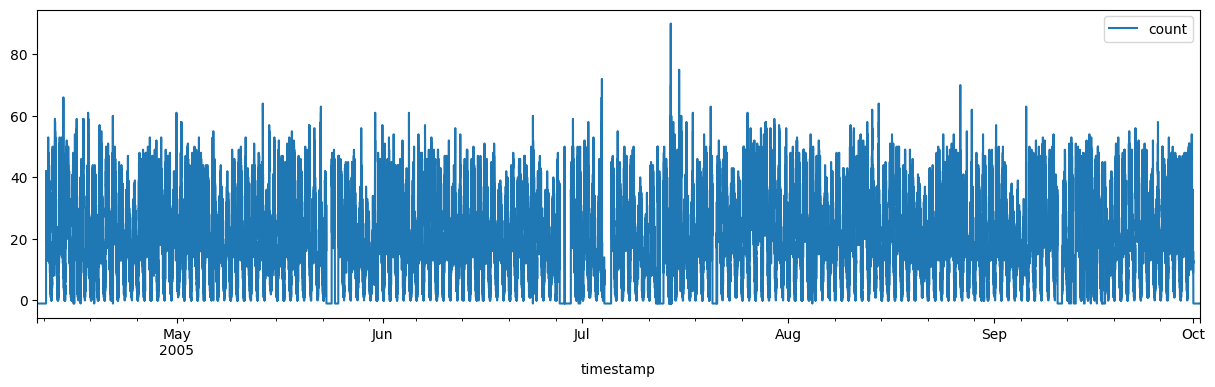

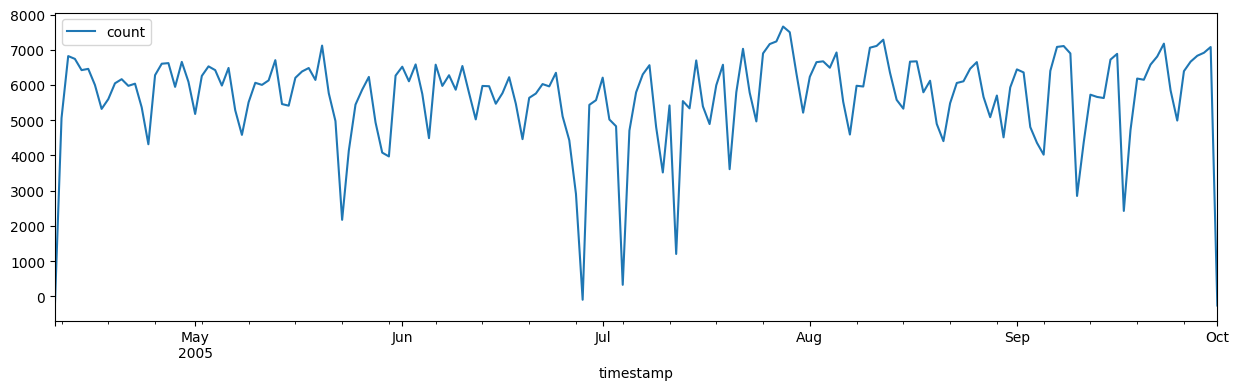

In [8]:
data_1_a.plot(x='timestamp', y='count', figsize=(15, 4))

data_1_a_resampled = data_1_a.resample('D', on='timestamp').sum()
data_1_a_resampled.plot(y='count', figsize=(15, 4))

### add labels into the data set

In [9]:
data_1_a.head(1)

,timestamp,count
0,2005-04-10,-1


In [10]:
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8


In [11]:
data_1_a['timestamp'][0]

Timestamp('2005-04-10 00:00:00')

In [12]:
pd.to_datetime(data_1_b['date'][0] + ' ' + data_1_b['begin_time'][0])

Timestamp('2005-04-12 13:10:00')

In [13]:
pd.to_datetime(data_1_b['date'][0] + ' ' + data_1_b['begin_time'][0]) < data_1_a['timestamp'][0]

False

In [14]:
data_1_b['timestamp_start'] = pd.to_datetime(data_1_b['date'] + ' ' + data_1_b['begin_time'], format='mixed')
data_1_b['timestamp_end'] = pd.to_datetime(data_1_b['date'] + ' ' + data_1_b['end_time'], format='mixed')
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score,timestamp_start,timestamp_end
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8,2005-04-12 13:10:00,2005-04-12 16:23:00


In [15]:
# Initialize the label column with default value
data_1_a['label'] = 0  # Start with 0, then mark 1 only for matching intervals

# Use vectorized operations to update the label based on timestamp intervals
for _, row in data_1_b.iterrows():
    mask = (data_1_a['timestamp'] >= row['timestamp_start']) & (data_1_a['timestamp'] <= row['timestamp_end'])
    data_1_a.loc[mask, 'label'] = 1

# Display the first 3 rows
data_1_a.head(3)

,timestamp,count,label
0,2005-04-10 00:00:00,-1,0
1,2005-04-10 00:05:00,-1,0
2,2005-04-10 00:10:00,-1,0


In [16]:
data_1_a[data_1_a['label'] == 0].head(3)

,timestamp,count,label
0,2005-04-10 00:00:00,-1,0
1,2005-04-10 00:05:00,-1,0
2,2005-04-10 00:10:00,-1,0


<Axes: xlabel='timestamp'>

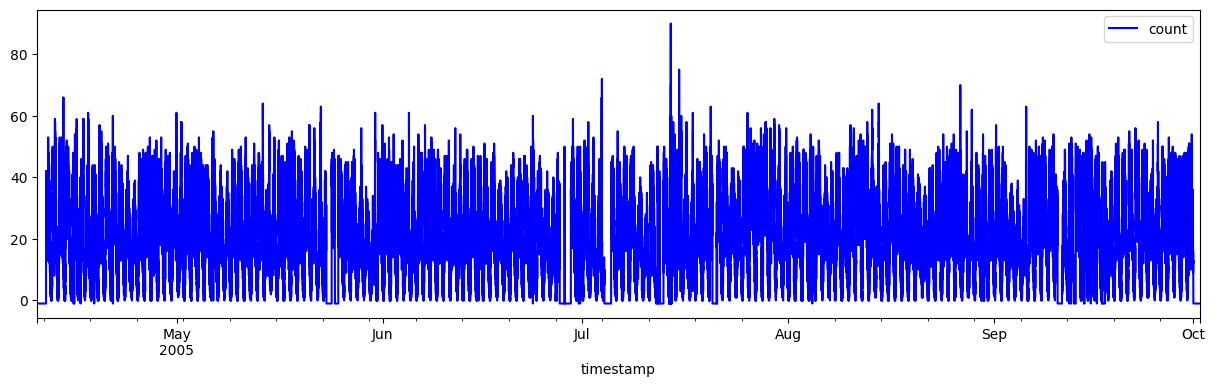

In [17]:
data_vis = data_1_a
data_vis.plot(x='timestamp', y='count', figsize=(15, 4), color='blue')

In [ ]:
data_vis.head(1)

,timestamp,count,label
0,2005-04-10,-1,0


In [21]:
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score,timestamp_start,timestamp_end
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8,2005-04-12 13:10:00,2005-04-12 16:23:00


In [22]:
data_1_b['timestamp_start']

0    2005-04-12 13:10:00
1    2005-04-13 19:10:00
2    2005-04-15 19:40:00
3    2005-04-16 19:10:00
4    2005-04-17 13:10:00
             ...        
76   2005-09-25 13:10:00
77   2005-09-26 19:10:00
78   2005-09-27 19:10:00
79   2005-09-28 19:10:00
80   2005-09-29 19:10:00
Name: timestamp_start, Length: 81, dtype: datetime64[ns]

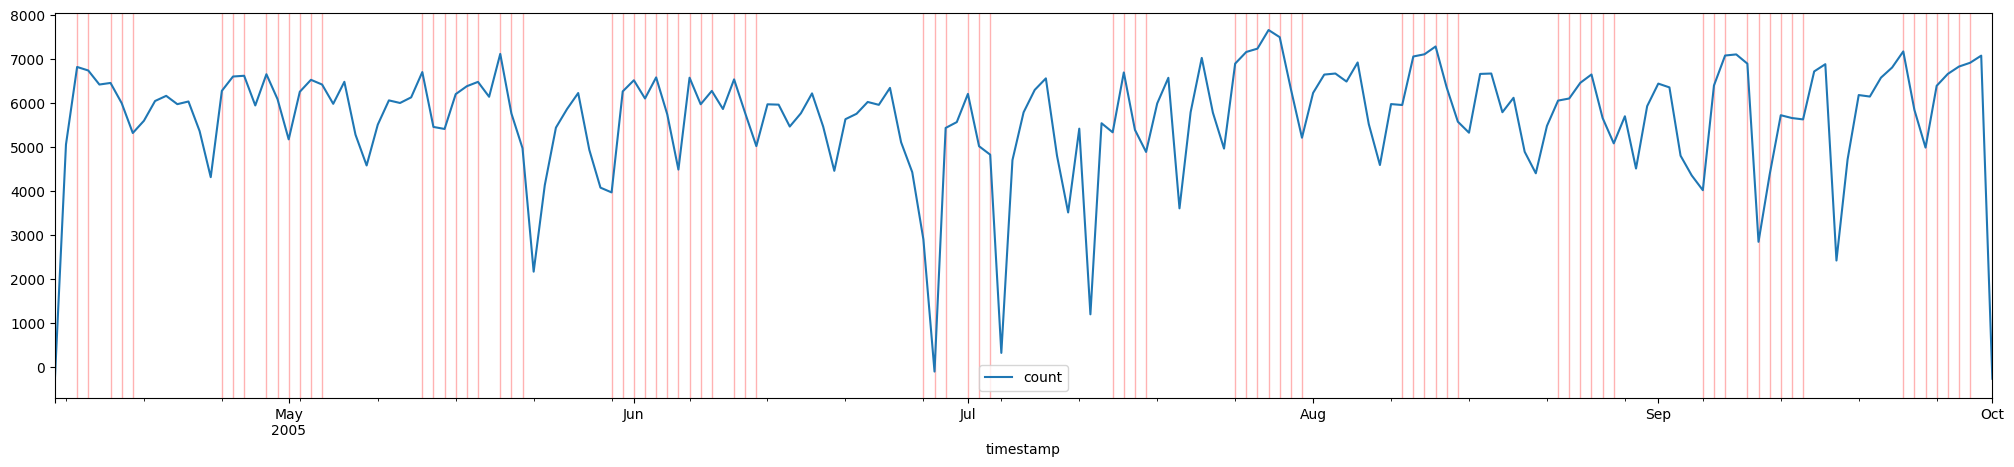

In [56]:
start_time = data_1_b['timestamp_start']
end_time = data_1_b['timestamp_end']

data_vis = data_1_a_resampled
data_vis.plot(y='count', figsize=(25, 5))

for start, end in zip(start_time, end_time):
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.show()


## Data 2
GHL Gasoil Plant Heating Loop data set

In [10]:
data_2 = pd.read_csv('data/GHL/01_Lev_fault_Temp_corr_seed_11_vars_23.csv')

In [11]:
data_2.head(3)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,0.0,100.0,0.0
1,1.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.163330,0.0,0.1,0.0,100.0,0.0
2,2.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.176666,0.0,0.1,0.0,100.0,0.0


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204560 entries, 0 to 204559
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time                204560 non-null  float64
 1   RT_level_ini        204560 non-null  float64
 2   DANGER              204560 non-null  float64
 3   FAULT               204560 non-null  float64
 4   RT_temperature.T    204560 non-null  float64
 5   C_temperature.T     204560 non-null  float64
 6   RT_level            204560 non-null  float64
 7   out_valve_act       204560 non-null  float64
 8   dT_rand             204560 non-null  float64
 9   inv_valve_act       204560 non-null  float64
 10  limiter.y           204560 non-null  float64
 11  inj_valve_act       204560 non-null  float64
 12  Relaxing.active     204560 non-null  float64
 13  boundary.m_flow_in  204560 non-null  float64
 14  dir_valve_act       204560 non-null  float64
 15  dt_rand             204560 non-nul

In [13]:
data_2.describe()

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
count,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,...,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000,204560.000000
mean,100035.106969,2.196744,0.000724,0.000034,312.318891,326.514477,1.738696,0.026907,-0.040338,0.039108,...,2.205025,0.035789,0.162797,0.852229,322.229340,0.638111,0.438046,0.006130,101.627966,-0.040338
std,57700.934547,0.445784,0.026888,0.005850,13.015729,11.782597,0.522228,0.161811,0.866725,0.193853,...,6.264069,0.185764,1.013496,0.517666,10.070366,0.480548,0.228340,0.078056,10.134957,0.866725
min,0.000000,0.000000,0.000000,0.000000,283.033295,273.149994,0.500000,0.000000,-1.402661,0.000000,...,0.000000,0.000000,-2.930815,0.010000,283.149994,0.000000,0.100000,0.000000,70.691856,-1.402661
25%,50113.750000,1.816195,0.000000,0.000000,301.657501,328.820648,1.337687,0.000000,-0.725303,0.000000,...,0.000000,0.000000,-0.547410,0.405230,316.375504,0.000000,0.100000,0.000000,94.525894,-0.725303
50%,100055.500000,2.113704,0.000000,0.000000,314.207062,329.645660,1.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100497,0.861635,326.088821,1.000000,0.600000,0.000000,101.004974,0.000000
75%,150027.250000,2.647305,0.000000,0.000000,324.234467,329.863434,2.183744,0.000000,0.836238,0.000000,...,0.000000,0.000000,0.980377,1.252192,330.044823,1.000000,0.600000,0.000000,109.803764,0.836238
max,200000.000000,2.990000,1.000000,1.000000,330.833313,329.977478,2.990000,1.000000,1.634999,1.000000,...,20.000000,1.000000,2.922910,1.744060,333.000000,1.000000,0.600000,1.000000,129.229095,1.634999


<Axes: xlabel='Time'>

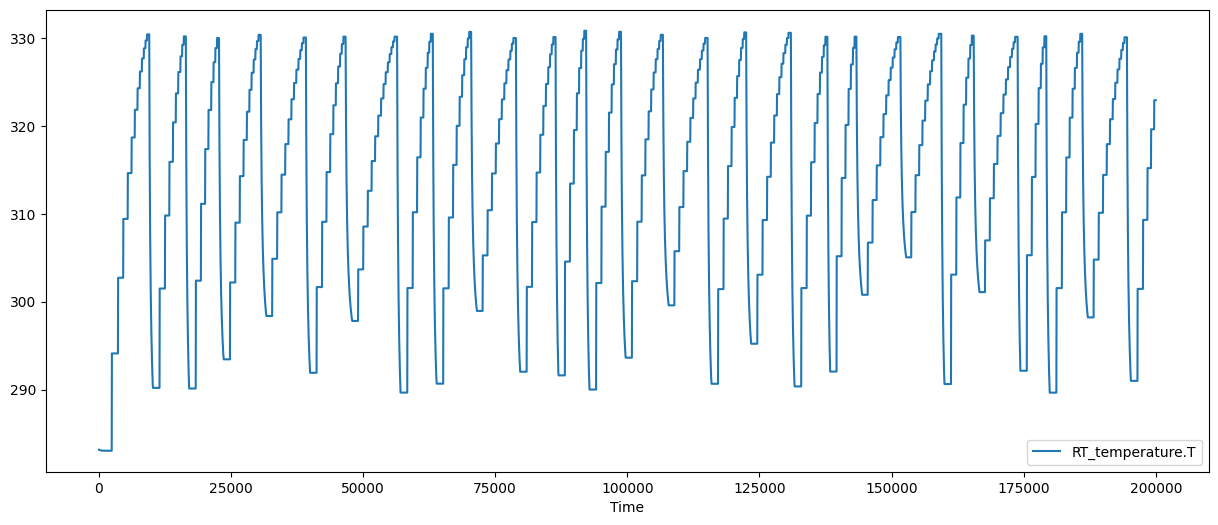

In [17]:
data_2.plot(x='Time', y='RT_temperature.T', figsize=(15, 6))

## Data 3
Electromyography (EMG) data for hand gestures

In [ ]:
data_3

## Data 4